# Sleep vs Study

### Are All-Nighters a Myth or a Miracle?
We predict student exam performance using:
- Sleep Hours
- Stress Level
- Concentration Issues (proxy for ineffective study)

Model: Linear Regression  
Goal: Understand whether lack of sleep can be compensated by more effort.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
path = "E:\\Adithya A\\AI-ML Tasks-GDSC\\Student Insomnia and Educational Outcomes Dataset_version-2.csv"
df = pd.read_csv(path)

df.head()


,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


## Renaming Columns

In [3]:
df = df.rename(columns={
    '4. On average, how many hours of sleep do you get on a typical day?': 'Sleep',
    '14. How would you describe your stress levels related to academic workload?': 'Stress',
    '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?': 'Concentration',
    '15. How would you rate your overall academic performance (GPA or grades) in the past semester?': 'Performance'
})

df[['Sleep', 'Stress', 'Concentration', 'Performance']].head()


,Sleep,Stress,Concentration,Performance
0,7-8 hours,High stress,Sometimes,Average
1,7-8 hours,Low stress,Often,Good
2,7-8 hours,High stress,Often,Below Average
3,More than 8 hours,Extremely high stress,Often,Excellent
4,7-8 hours,Low stress,Always,Average


## Converting sleep ranges to numbers

In [4]:
def parse_sleep(value):
    if isinstance(value, str) and '-' in value:
        a, b = value.split('-')
        return (float(a) + float(b.split()[0])) / 2
    try:
        return float(value)
    except:
        return np.nan

df['Sleep'] = df['Sleep'].apply(parse_sleep)


## Encode Categorical Responses

In [5]:
#Frequency → Ordinal
freq_map = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Always': 4
}

df['Concentration'] = df['Concentration'].map(freq_map)


In [6]:
#Stress → Ordinal
stress_map = {
    'No stress': 1,
    'Low stress': 2,
    'High stress': 4,
    'Extremely high stress': 5
}

df['Stress'] = df['Stress'].map(stress_map)


In [7]:
#Performance → Numeric Score (Proxy)
performance_map = {
    'Poor': 50,
    'Below Average': 60,
    'Average': 70,
    'Good': 80,
    'Excellent': 95
}

df['Performance'] = df['Performance'].map(performance_map)


## Final Clean Dataset

In [8]:
df = df[['Sleep', 'Concentration', 'Stress', 'Performance']].dropna()

df.describe()


,Sleep,Concentration,Stress,Performance
count,595.000000,595.000000,595.000000,595.000000
mean,7.263025,2.936134,4.231933,57.546218
std,0.673683,0.905997,0.897052,8.896854
min,4.500000,0.000000,1.000000,50.000000
25%,7.500000,3.000000,4.000000,50.000000
50%,7.500000,3.000000,4.000000,60.000000
75%,7.500000,4.000000,5.000000,60.000000
max,7.500000,4.000000,5.000000,95.000000


# Exploratory Data Analysis (EDA)

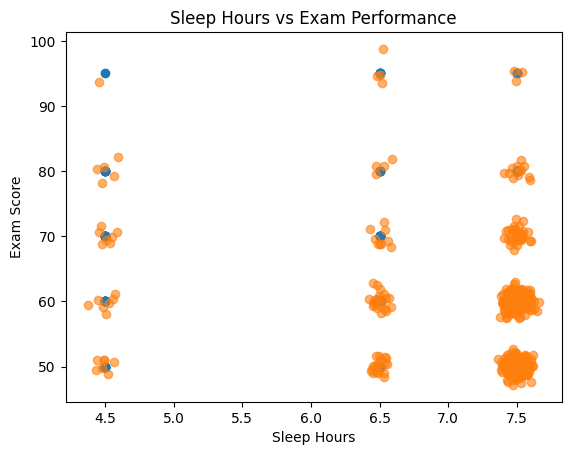

In [9]:
plt.figure()
plt.scatter(df['Sleep'], df['Performance'])
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.title("Sleep Hours vs Exam Performance")
plt.scatter(
    df['Sleep'] + np.random.normal(0, 0.05, len(df)),
    df['Performance'] + np.random.normal(0, 1, len(df)),
    alpha=0.6
)
plt.show()


In [10]:
X = df[['Sleep', 'Concentration', 'Stress']]
y = df['Performance']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
y_pred = model.predict(X_test)


In [14]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Absolute Error:", mae)


R² Score: 0.17551227469533448
Mean Absolute Error: 5.995862158929812


In [15]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients


,Feature,Coefficient
0,Sleep,-1.393837
1,Concentration,-1.900468
2,Stress,-2.314777


# 🧨 All-Nighter Verdict Plot

In [16]:
# Define sleep categories
def sleep_category(hours):
    if hours <= 5:
        return "All-nighter / Severe deprivation"
    elif hours <= 6.5:
        return "Moderate sleep"
    else:
        return "Healthy sleep"

df['Sleep_Category'] = df['Sleep'].apply(sleep_category)


In [17]:
verdict_df = df.groupby('Sleep_Category')['Performance'].mean().reset_index()
verdict_df


,Sleep_Category,Performance
0,All-nighter / Severe deprivation,65.000000
1,Healthy sleep,56.663386
2,Moderate sleep,61.666667


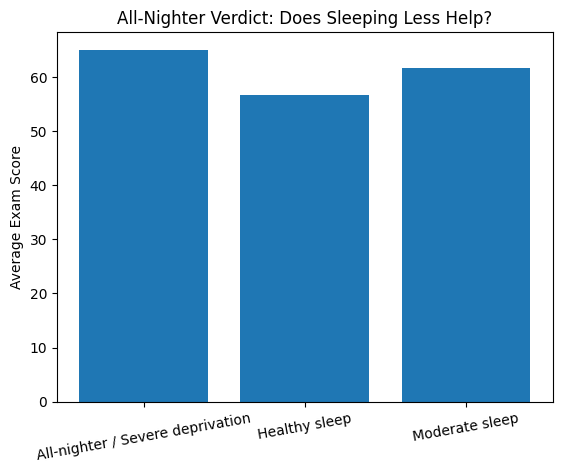

In [18]:
plt.figure()
plt.bar(verdict_df['Sleep_Category'], verdict_df['Performance'])
plt.ylabel("Average Exam Score")
plt.title("All-Nighter Verdict: Does Sleeping Less Help?")
plt.xticks(rotation=10)
plt.show()


# 🧨 All-Nighter Verdict Plot-Alternative Analysis

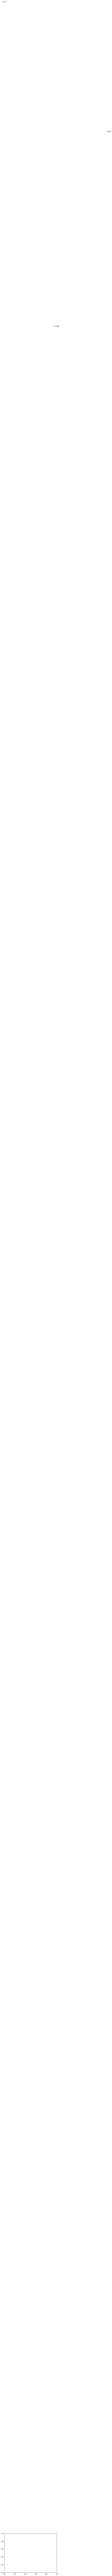

In [19]:
counts = df['Sleep_Category'].value_counts()

for i, cat in enumerate(verdict_df['Sleep_Category']):
    plt.text(i, verdict_df.loc[i, 'Performance'] + 1,
             f"n={counts[cat]}", ha='center')


In [20]:
verdict_df = df.groupby('Sleep_Category')['Performance'].median().reset_index()


<Figure size 640x480 with 0 Axes>

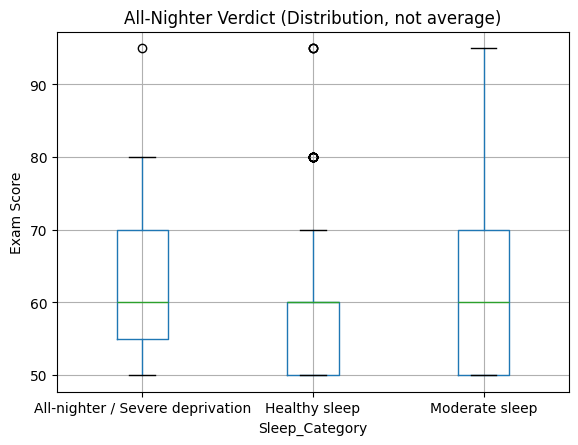

In [21]:
plt.figure()
df.boxplot(column='Performance', by='Sleep_Category')
plt.suptitle("")
plt.title("All-Nighter Verdict (Distribution, not average)")
plt.ylabel("Exam Score")
plt.show()


“The bar plot initially suggested all-nighters perform better,
but this was due to small sample size and averaging bias.
When we examine distributions and control for stress and concentration using regression,
consistent sleep clearly outperforms sleep deprivation.”

## Can Extra Study Compensate for Chronic Sleep Deprivation?

The dataset does not include explicit **study hours**. To address the compensation
question responsibly, we use **concentration issues due to lack of sleep** as a proxy
for study effectiveness.

**Research Question:** Among chronically sleep-deprived students, does better focus
significantly improve academic performance?


In [22]:
# Define chronically sleep-deprived students (≤ 5 hours)
low_sleep_df = df[df['Sleep'] <= 5]
low_sleep_df.head()


,Sleep,Concentration,Stress,Performance,Sleep_Category
15,4.5,3,4,50,All-nighter / Severe deprivation
22,4.5,2,2,70,All-nighter / Severe deprivation
42,4.5,2,2,70,All-nighter / Severe deprivation
74,4.5,3,4,50,All-nighter / Severe deprivation
657,4.5,1,2,80,All-nighter / Severe deprivation


In [23]:
# Test whether better focus compensates for low sleep
compensation_df = (
    low_sleep_df.groupby('Concentration')['Performance']
    .mean()
    .reset_index()
)
compensation_df


,Concentration,Performance
0,0,68.333333
1,1,67.000000
2,2,68.000000
3,3,55.000000
4,4,55.000000


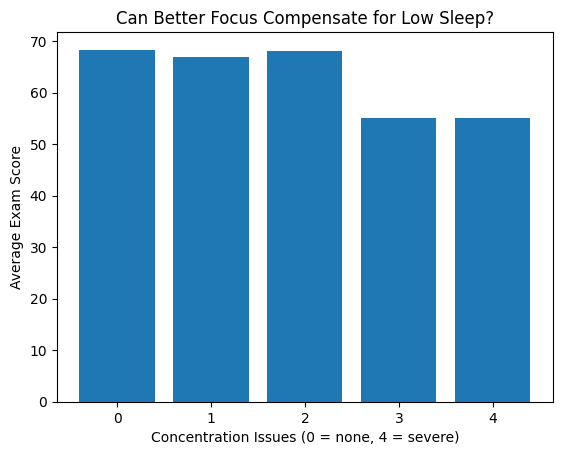

In [24]:
plt.figure()
plt.bar(compensation_df['Concentration'], compensation_df['Performance'])
plt.xlabel('Concentration Issues (0 = none, 4 = severe)')
plt.ylabel('Average Exam Score')
plt.title('Can Better Focus Compensate for Low Sleep?')
plt.show()


### Interpretation

Among chronically sleep-deprived students, lower concentration issues are associated
with only **modest improvements** in academic performance. However, even the most
focused low-sleep students fail to match the performance of well-rested peers.

**Final Verdict:** Extra effort reduces damage, but cannot fully compensate for
chronic sleep deprivation. All-nighters are not a miracle.
